In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_style("whitegrid")

### Simulation

In [3]:
def update(x1, x2, x3, x4, u, f1=0, f2=0, T=1):
    avg = (x3 + x4)/2
    x3 = avg + np.random.normal(scale=0.01)
    x4 = avg + np.random.normal(scale=0.01)
    dx1 = -0.2 * x1 + u + f1 + np.random.normal(scale=0.01)
    dx2 = -0.2 * x2 + u + f2 + np.random.normal(scale=0.01)
    dx3 = -0.2 * x3 + 0.1 * x1 + np.random.normal(scale=0.01)
    dx4 = -0.2 * x4 + 0.1 * x2 + np.random.normal(scale=0.01)
    
    x1 = x1 + T * dx1
    x2 = x2 + T * dx2
    x3 = x3 + T * dx3
    x4 = x4 + T * dx4
    
    return x1, x2, x3, x4

In [4]:
def simulate(x10, x20, x30, x40, u, f1, f2):
    x1, x2, x3, x4 = x10, x20, x30, x40
    rows = []
    for i in range(len(u)):
        rows.append((x1, x2, x3, x4))
        x1, x2, x3, x4 = update(x1, x2, x3, x4, u[i], f1[i], f2[i])
    df = pd.DataFrame(rows, columns=['x1', 'x2', 'x3', 'x4'])
    return df

In [5]:
def prepare_data(x10, x20, x30, x40, u, f1, f2):
    df = simulate(x10, x20, x30, x40, u, f1, f2)
    df['u'] = u
    df['f1'] = f1
    df['f2'] = f2
    df['x1(k-1)'] = df['x1'].shift(1)
    df['x2(k-1)'] = df['x2'].shift(1)
    df['x3(k-1)'] = df['x3'].shift(1)
    df['x4(k-1)'] = df['x4'].shift(1)
    df.dropna(inplace=True)
    return df

#### No fault

In [6]:
N = 200
t = np.arange(0, N)
u = np.sin(0.1 * t)
f1 = np.zeros(N)
f2 = np.zeros(N)

In [7]:
df_nf = prepare_data(0, 0, 0, 0, u, f1, f2)

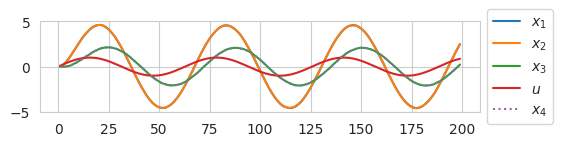

In [8]:
plt.figure(figsize=(5, 1.5))
plt.plot(df_nf[['x1', 'x2', 'x3', 'u']], label=['$x_1$', '$x_2$', '$x_3$', '$u$']);
plt.plot(df_nf['x4'], ':', label='$x_4$')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig('pic/no_fault_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### f1

In [9]:
N = 200
t = np.arange(0, N)
u = np.sin(0.1 * t)
f1 = np.concatenate([np.zeros(N//2), np.ones(N//2)])
f2 = np.zeros(N)

In [10]:
df_f1 = prepare_data(0, 0, 0, 0, u, f1, f2)

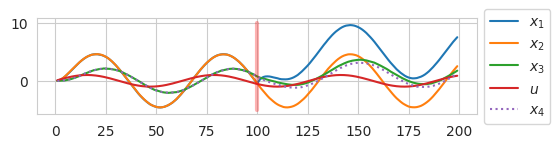

In [11]:
plt.figure(figsize=(5, 1.5))
plt.plot(df_f1[['x1', 'x2', 'x3', 'u']], label=['$x_1$', '$x_2$', '$x_3$', '$u$']);
plt.plot(df_f1['x4'], ':', label='$x_4$')
plt.plot((100, 100), (-5, 10), c='r', alpha=0.3, linewidth=3)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig('pic/f1_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### f2

In [12]:
N = 200
t = np.arange(0, N)
u = np.sin(0.1 * t)
f1 = np.zeros(N)
f2 = np.concatenate([np.zeros(N//2), np.ones(N//2)])

In [13]:
df_f2 = prepare_data(0, 0, 0, 0, u, f1, f2)

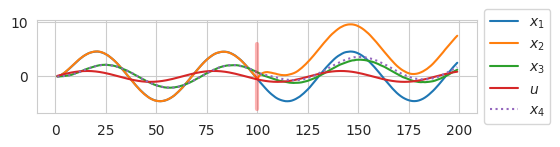

In [14]:
plt.figure(figsize=(5, 1.5))
plt.plot(df_f2[['x1', 'x2', 'x3', 'u']], label=['$x_1$', '$x_2$', '$x_3$', '$u$']);
plt.plot(df_f2['x4'], ':', label='$x_4$')
plt.plot((100, 100), (-6, 6), c='r', alpha=0.3, linewidth=3)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig('pic/f2_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
df_nf[['x1', 'x2', 'x3', 'x4', 'u', 'f1', 'f2']].to_csv('data/nf_ex2.csv', sep=';')
df_f1[['x1', 'x2', 'x3', 'x4', 'u', 'f1', 'f2']].to_csv('data/f1_ex2.csv', sep=';')
df_f2[['x1', 'x2', 'x3', 'x4', 'u', 'f1', 'f2']].to_csv('data/f2_ex2.csv', sep=';')

### Linear autoregressive models according to Model Structures

#### y3 = f(u)

In [16]:
cols = ['x3(k-1)', 'u']
out = 'x3'
X = df_nf[cols]
y = df_nf[[out]]

In [17]:
reg = LinearRegression(fit_intercept=False).fit(X, y)

In [18]:
reg.score(X, y)

0.9998057413061965

In [19]:
reg.coef_

array([[0.93763443, 0.23469657]])

In [20]:
x1_hat = reg.predict(X)

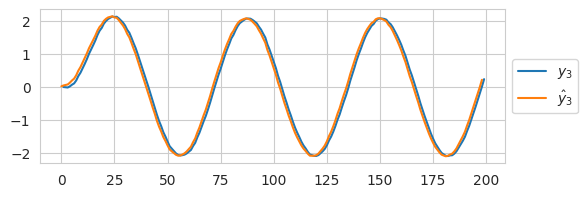

In [21]:
plt.figure(figsize=(6, 2))
plt.plot(df_nf[out], label='$y_3$');
plt.plot(x1_hat, label='$\hat{y}_3$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [22]:
X = df_f1[cols]
x3_hat_f1 = reg.predict(X)
X = df_f2[cols]
x3_hat_f2 = reg.predict(X)

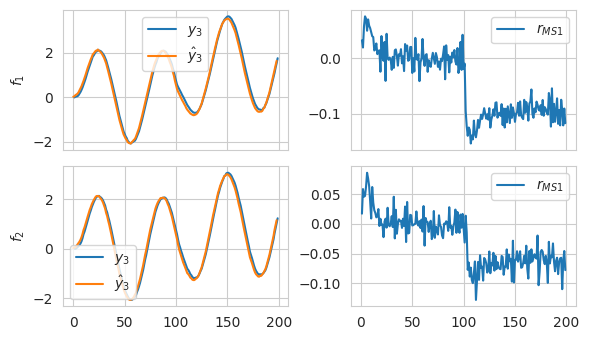

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1[out], label='$y_3$')
axs[0, 0].plot(x3_hat_f1, label='$\hat{y}_3$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(x3_hat_f1 - df_f1[[out]], label='$r_{MS1}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2[out], label='$y_3$')
axs[1, 0].plot(x3_hat_f2, label='$\hat{y}_3$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(x3_hat_f2 - df_f2[[out]], label='$r_{MS1}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/r1_linear_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### y3 = f(u, y4)

In [24]:
cols = ['x3(k-1)', 'u', 'x4']
out = 'x3'
X = df_nf[cols]
y = df_nf[[out]]

In [25]:
reg = LinearRegression(fit_intercept=False).fit(X, y)

In [26]:
reg.score(X, y)

0.9998749663083901

In [27]:
reg.coef_

array([[0.3335871 , 0.08366107, 0.6444243 ]])

In [28]:
x3_hat = reg.predict(X)

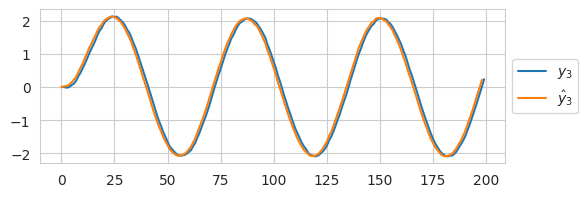

In [29]:
plt.figure(figsize=(6, 2))
plt.plot(df_nf[out], label='$y_3$');
plt.plot(x3_hat, label='$\hat{y}_3$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [30]:
X = df_f1[cols]
x3_hat_f1 = reg.predict(X)
X = df_f2[cols]
x3_hat_f2 = reg.predict(X)

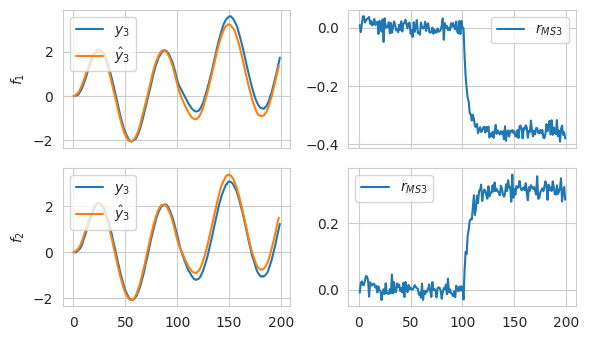

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1[out], label='$y_3$')
axs[0, 0].plot(x3_hat_f1, label='$\hat{y}_3$')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(x3_hat_f1 - df_f1[[out]], label='$r_{MS3}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2[out], label='$y_3$')
axs[1, 0].plot(x3_hat_f2, label='$\hat{y}_3$')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(x3_hat_f2 - df_f2[[out]], label='$r_{MS3}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/r3_linear_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

### MSOs

In [32]:
import faultdiagnosistoolbox as fdt
import sympy as sym

#### Structural model definition

In [33]:
modeldef = {
    "type": "Symbolic",
    "x": ["x1", "x2", "x3", "x4", "dx1", "dx2", "dx3", "dx4"],
    "f": ["f1", "f2"],
    "z": ["y3", "y4", "u"]
}

sym.var(modeldef["x"])
sym.var(modeldef["f"])
sym.var(modeldef["z"])

modeldef["rels"] = [
    # using equations below give the same result, but more msos
    #- avg + (x3 + x4)/2,
    # -x3 + avg,
    # -x4 + avg,
    -dx1 - 0.2 * x1 + u + f1,
    -dx2 + u -0.2 * x2 + f2,
    -dx3 - 0.2 * x3 + 0.1 * x1,
    -dx4 - 0.2 * x4 + 0.1 * x2,
    -x3 + x4,
    -y3 + x3,
    -y4 + x4,
    fdt.DiffConstraint("dx1", "x1"),
    fdt.DiffConstraint("dx2", "x2"),
    fdt.DiffConstraint("dx3", "x3"),
    fdt.DiffConstraint("dx4", "x4")
]

In [34]:
model = fdt.DiagnosisModel(modeldef, name="")

In [35]:
model.Lint()

Model information

  Type:Symbolic, dynamic

  Variables and equations
    8 unknown variables
    3 known variables
    2 fault variables
    11 equations, including 4 differential constraints

  Degree of redundancy: 3
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


In [36]:
sns.set_style("white")

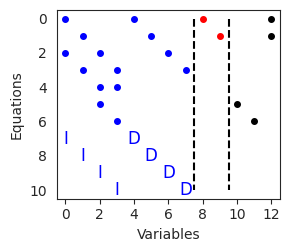

In [37]:
# structural model plot
plt.figure(figsize=(3, 3))
model.PlotModel()
plt.tight_layout()
plt.savefig('pic/structural_model_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

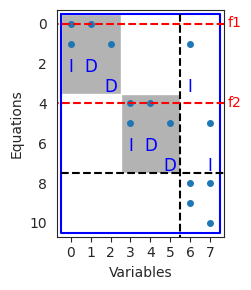

In [38]:
# Dulmage–Mendelsohn decomposition
plt.figure(figsize=(3, 3))
model.PlotDM(fault=True, eqclass=True)
plt.tight_layout()
plt.savefig('pic/dm_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
# Isolability analysis
model.IsolabilityAnalysis()

array([[1, 0],
       [0, 1]])

In [40]:
# Isolability analysis in integral causality
model.IsolabilityAnalysis(causality = 'int')

array([[1, 0],
       [0, 1]])

#### MSOs

In [41]:
msos = model.MSO()
msos

[array([6, 4, 5], dtype=int32),
 array([ 6,  1,  3,  8, 10], dtype=int32),
 array([ 4,  5,  1,  3,  8, 10], dtype=int32),
 array([5, 0, 2, 7, 9], dtype=int32),
 array([4, 6, 0, 2, 7, 9], dtype=int32),
 array([ 4,  1,  3,  8, 10,  0,  2,  7,  9], dtype=int32)]

In [42]:
for i, e in enumerate(model.syme):
    print(i, ":   ", e)

0 :    Eq(-dx1 + f1 + u - 0.2*x1, 0)
1 :    Eq(-dx2 + f2 + u - 0.2*x2, 0)
2 :    Eq(-dx3 + 0.1*x1 - 0.2*x3, 0)
3 :    Eq(-dx4 + 0.1*x2 - 0.2*x4, 0)
4 :    Eq(-x3 + x4, 0)
5 :    Eq(x3 - y3, 0)
6 :    Eq(x4 - y4, 0)
7 :    ['dx1', 'x1', 'diff']
8 :    ['dx2', 'x2', 'diff']
9 :    ['dx3', 'x3', 'diff']
10 :    ['dx4', 'x4', 'diff']


In [43]:
msos_low_index = [m for m in msos if model.IsLowIndex(m)]
len(msos_low_index)

6

In [44]:
# Fault signature matrix
fsm = model.FSM(msos)
fsm

array([[0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1]])

In [45]:
# Relationship between diagnosis signals (MSOs) - known variables)
me = model.MeasurementEquations(model.z)
rsz = [[e for e in mso if e in me] for mso in msos]
for row in rsz:
    row.sort()
for row in rsz:
    print([s for e in row for s in list(model.syme[e].free_symbols) if str(s) in model.z])

[y3, y4]
[u, y4]
[u, y3]
[u, y3]
[u, y4]
[u, u]


#### M3 and M4
* For further analysis we select two MSOs wit the same known signals and different fault sensitivity
* We build two residual generatortor using M3 and M4, where $y_3$ is the model output in both cases

In [46]:
M3 = msos[2]
M4 = msos[3]

In [47]:
M3

array([ 4,  5,  1,  3,  8, 10], dtype=int32)

In [48]:
model.MSOCausalitySweep(M3)

['int', 'int', 'der', 'mixed', 'mixed', 'int']

In [49]:
M4

array([5, 0, 2, 7, 9], dtype=int32)

In [50]:
model.MSOCausalitySweep(M4)

['int', 'der', 'mixed', 'mixed', 'int']

In [51]:
# residual generatior for M1
r = 5
M0 = [e for e in M3 if e != r]
Gamma =model.Matching(M0)
model.SeqResGen(Gamma, r, 'ResGen3_ex2')

Generating residual generator ResGen3_ex2 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File ResGen3_ex2.py generated.


In [52]:
r = 5
M0 = [e for e in M4 if e != r]
Gamma =model.Matching(M0)
model.SeqResGen(Gamma, r, 'ResGen4_ex2')

Generating residual generator ResGen4_ex2 (Python, no batch)
  Generating code for the exactly determined part: ..
  Generating code for the residual equations
  Writing residual generator file
File ResGen4_ex2.py generated.


### Residuals from residual generators

In [53]:
from ResGen3_ex2 import ResGen3_ex2
from ResGen4_ex2 import ResGen4_ex2

In [54]:
def compute_residual(ResGen, state, z, x):
    r = np.zeros(len(z)) # N number of data points
    xs = []
    for k, zk in enumerate(z.itertuples()):
        r[k], state = ResGen(zk[1:], state, None, 1)
        xs.append(state[x])
    return xs, r

#### ResGen3

In [55]:
# no fault
state = {'x2': 0, 'x4': 0}
z = df_nf[['x3', 'x4', 'u']]
x3s, r = compute_residual(ResGen3_ex2, state, z, 'x4')

In [56]:
sns.set_style("whitegrid")

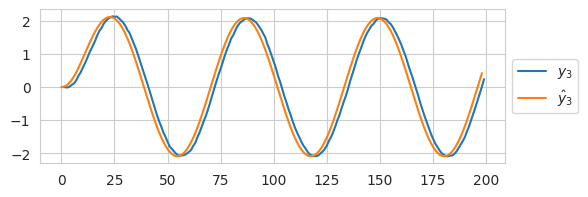

In [57]:
# x1 estimation by ResGen1
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x3'], label='$y_3$');
plt.plot(x3s, label='$\hat{y}_3$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [58]:
x3s_f1, r_f1 = compute_residual(ResGen3_ex2, {'x2': 0, 'x4': 0}, df_f1[['x3', 'x4', 'u']], 'x4')
x3s_f2, r_f2 = compute_residual(ResGen3_ex2, {'x2': 0, 'x4': 0}, df_f2[['x3', 'x4', 'u']], 'x4')

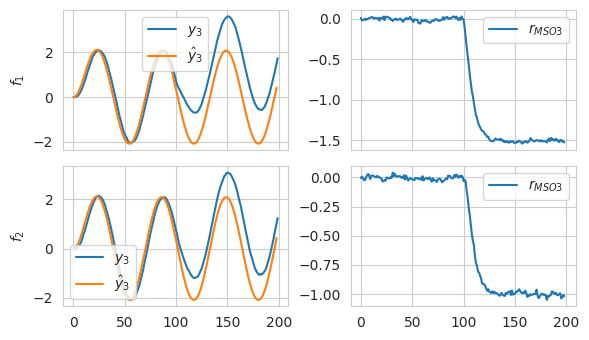

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x3'], label='$y_3$')
axs[0, 0].plot(x3s_f1, label='$\hat{y}_3$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(r_f1, label='$r_{MSO3}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x3'], label='$y_3$')
axs[1, 0].plot(x3s_f2, label='$\hat{y}_3$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(r_f2, label='$r_{MSO3}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso3_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### ResGen4

In [60]:
state = {'x1': 0, 'x3': 0}
z = df_nf[['x3', 'x4', 'u']]
x3s, r = compute_residual(ResGen4_ex2, state, z, 'x3')

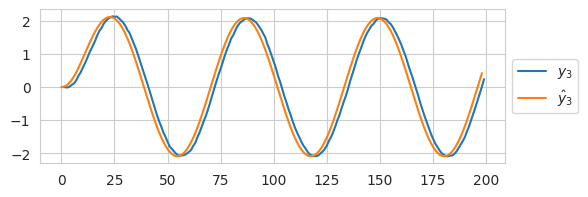

In [61]:
# x1 estimation by ResGen2
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x3'], label='$y_3$');
plt.plot(x3s, label='$\hat{y}_3$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [62]:
x3s_f1, r_f1 = compute_residual(ResGen4_ex2, {'x1': 0, 'x3': 0}, df_f1[['x3', 'x4', 'u']], 'x3')
x3s_f2, r_f2 = compute_residual(ResGen4_ex2, {'x1': 0, 'x3': 0}, df_f2[['x3', 'x4', 'u']], 'x3')

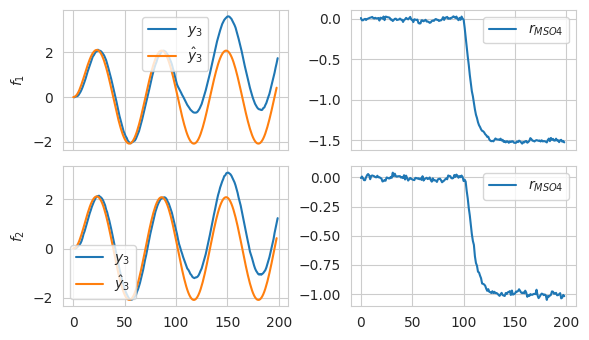

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x3'], label='$y_3$')
axs[0, 0].plot(x3s_f1, label='$\hat{y}_3$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(r_f1, label='$r_{MSO4}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x3'], label='$y_3$')
axs[1, 0].plot(x3s_f2, label='$\hat{y}_3$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(r_f2, label='$r_{MSO4}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso4_ex2.pdf', dpi=300, bbox_inches='tight')
plt.show()